In [ ]:
!pip install spacy scikit-learn

# Download the English model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#📘 The Simpsons Script Text Mining Analysis

In [ ]:
## Step 1: Install Required Libraries
!pip install nltk textblob matplotlib wordcloud

## Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
from collections import Counter
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## Step 3: Load the Dataset
from google.colab import files
uploaded = files.upload()

Saving simpsons_script_lines.csv to simpsons_script_lines.csv


In [ ]:
df = pd.read_csv(next(iter(uploaded)))
df = df[df['spoken_words'].notna()].copy()
df['spoken_words'] = df['spoken_words'].astype(str)

/tmp/ipython-input-4-272855900.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(next(iter(uploaded)))


In [ ]:
df.shape

(132112, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132112 entries, 0 to 158270
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  132112 non-null  int64  
 1   episode_id          132112 non-null  int64  
 2   number              132112 non-null  int64  
 3   raw_text            132112 non-null  object 
 4   timestamp_in_ms     132112 non-null  object 
 5   speaking_line       132112 non-null  object 
 6   character_id        132110 non-null  object 
 7   location_id         131735 non-null  float64
 8   raw_character_text  132110 non-null  object 
 9   raw_location_text   131735 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  int64  
 13  cleaned_text        132112 non-null  object 
 14  sentiment           132112 non-null  float64
dtypes: float64(2), int64(4), object(9)
memo

In [ ]:
df.describe()

,id,episode_id,number,location_id,word_count,sentiment
count,132112.000000,132112.000000,132112.000000,131735.000000,132112.000000,132112.000000
mean,78446.016183,275.914376,142.246291,829.569461,9.856962,0.061738
std,45806.031091,163.767957,83.768697,1197.118699,8.036465,0.278866
min,3.000000,1.000000,0.000000,1.000000,0.000000,-1.000000
25%,38890.750000,135.000000,70.000000,5.000000,4.000000,0.000000
50%,77891.000000,270.000000,141.000000,190.000000,8.000000,0.000000
75%,118165.500000,416.000000,211.000000,1308.000000,13.000000,0.125000
max,158315.000000,568.000000,394.000000,4458.000000,122.000000,1.000000


In [ ]:
## Step 4: Basic Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_text'] = df['spoken_words'].apply(clean_text)

In [ ]:
## Step 5: Word Frequency Analysis
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
print(word_freq)

Counter({'the': 42022, 'you': 37436, 'i': 35839, 'a': 31157, 'to': 27291, 'and': 19307, 'of': 16257, 'it': 14007, 'that': 12762, 'my': 12725, 'in': 12683, 'is': 12448, 'this': 11687, 'me': 10912, 'your': 10472, 'for': 10158, 'im': 9435, 'we': 8255, 'on': 8221, 'oh': 8172, 'what': 7729, 'have': 7512, 'no': 7447, 'but': 7367, 'be': 7191, 'well': 7025, 'its': 6912, 'dont': 6878, 'all': 6726, 'just': 6687, 'with': 6440, 'are': 6403, 'do': 6394, 'now': 6028, 'not': 6011, 'like': 5970, 'so': 5883, 'was': 5500, 'get': 5225, 'youre': 5039, 'can': 4994, 'know': 4729, 'one': 4660, 'at': 4531, 'thats': 4491, 'up': 4420, 'out': 4408, 'here': 4390, 'hey': 4290, 'if': 4197, 'homer': 4128, 'right': 4042, 'were': 3850, 'go': 3722, 'got': 3714, 'he': 3598, 'our': 3386, 'how': 3374, 'about': 3313, 'bart': 3307, 'ill': 3181, 'there': 3077, 'from': 3072, 'see': 3008, 'they': 3004, 'good': 2994, 'yeah': 2988, 'as': 2934, 'will': 2879, 'think': 2845, 'want': 2778, 'why': 2773, 'an': 2703, 'cant': 2695, 'loo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Group spoken text by character
char_docs = df.groupby('raw_character_text')['cleaned_text'].apply(lambda x: ' '.join(x)).dropna()

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(char_docs)

# Create DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=char_docs.index, columns=tfidf_vectorizer.get_feature_names_out())

# 🔍 Preview the result
tfidf_df.sample(3)

,abe,able,absolutely,act,action,actually,admit,afford,afraid,age,...,year,years,yep,yes,yo,youd,youll,young,youre,youve
raw_character_text,,,,,,,,,,,,,,,,,,,,,
Alphonse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Catapult Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RERPORTER #4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


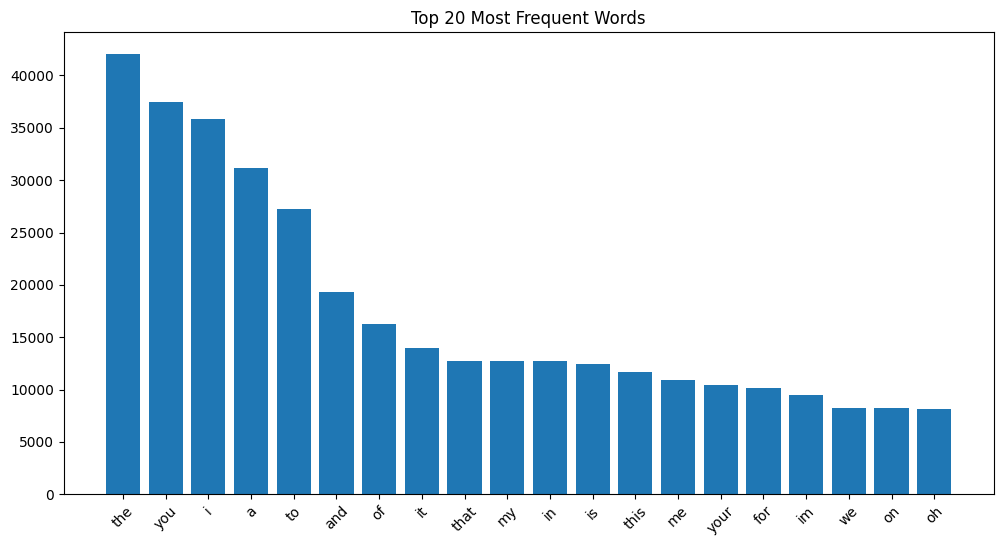

In [ ]:
# Top 20 words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

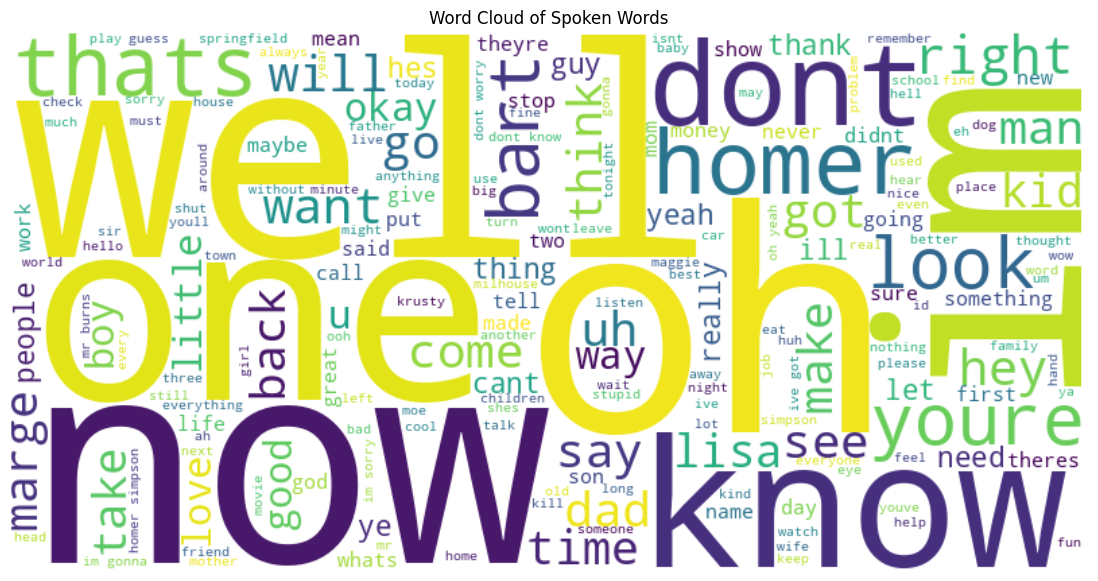

In [ ]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Spoken Words")
plt.show()

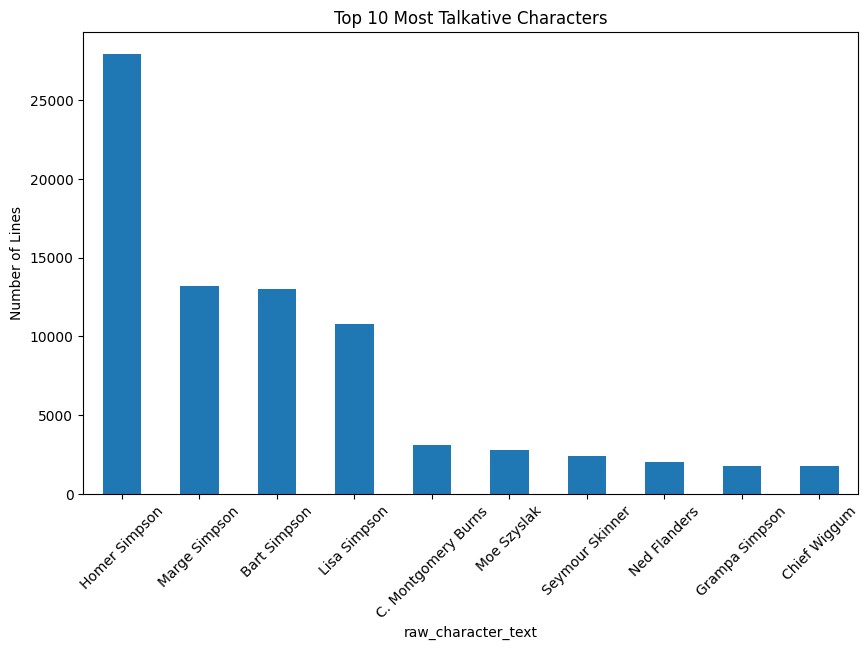

In [ ]:
## Step 6: Most Talkative Characters
talkative = df['raw_character_text'].value_counts().head(10)
talkative.plot(kind='bar', figsize=(10,6), title='Top 10 Most Talkative Characters')
plt.ylabel('Number of Lines')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Step 7: Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['spoken_words'].apply(get_sentiment)

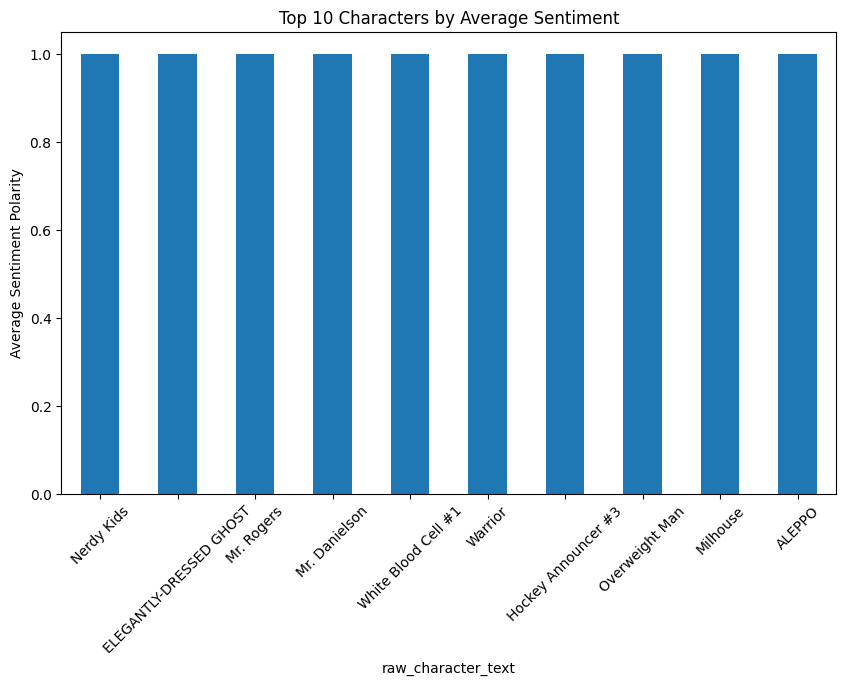

In [ ]:
# Average sentiment per character
char_sentiment = df.groupby('raw_character_text')['sentiment'].mean().sort_values(ascending=False).dropna().head(10)
char_sentiment.plot(kind='bar', figsize=(10,6), title='Top 10 Characters by Average Sentiment')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

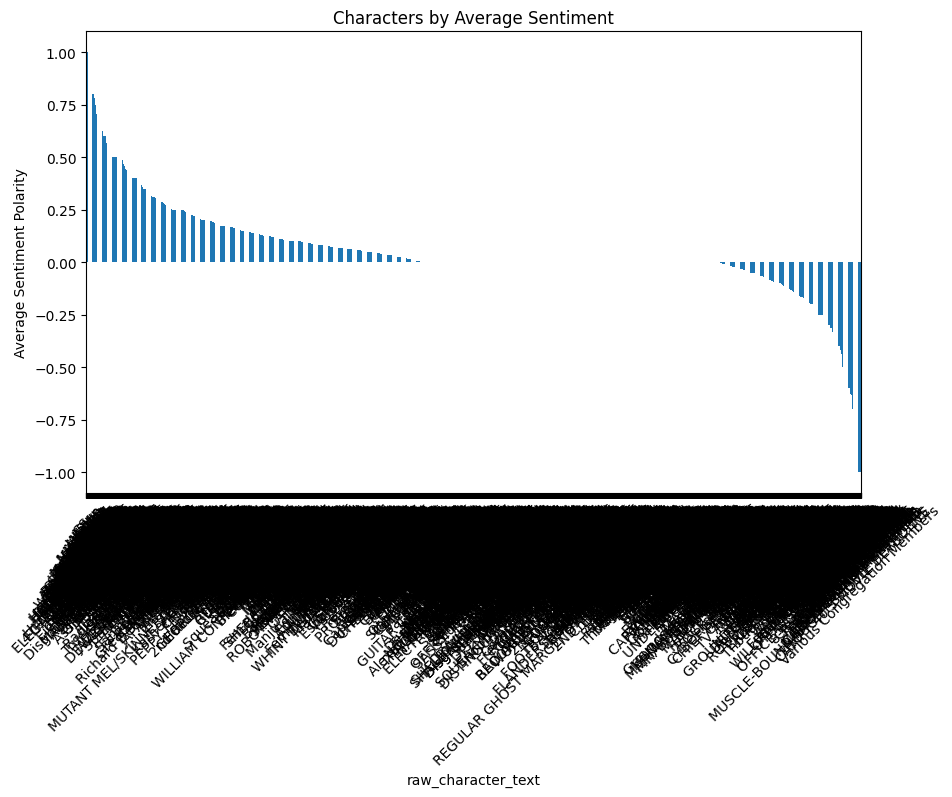

In [ ]:
# Average sentiment per character
char_sentiment = df.groupby('raw_character_text')['sentiment'].mean().sort_values(ascending=False).dropna()
char_sentiment.plot(kind='bar', figsize=(10,6), title='Characters by Average Sentiment')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

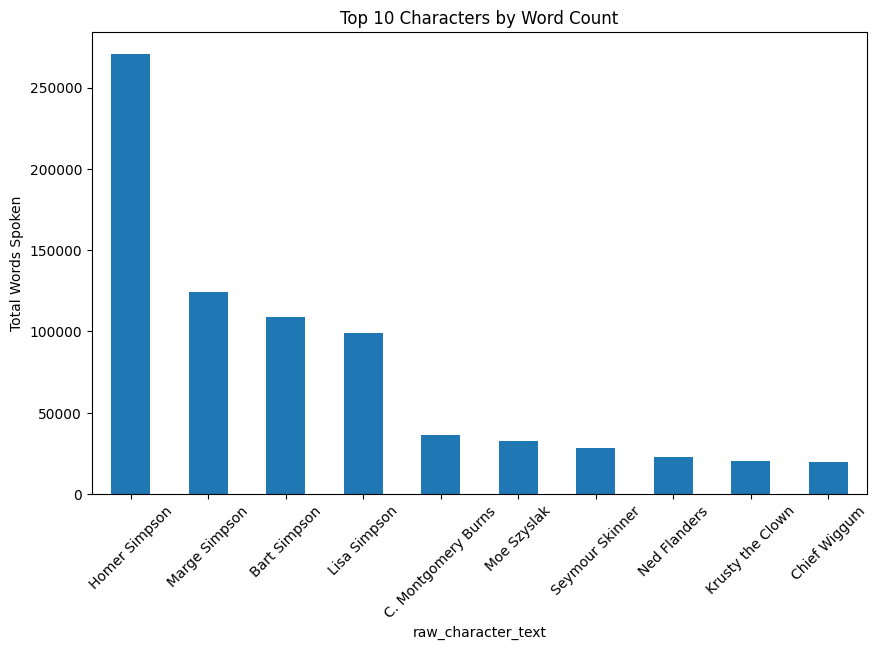

In [ ]:
#Top 10 Characters by Total Word Count

df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
char_word_counts = df.groupby('raw_character_text')['word_count'].sum().sort_values(ascending=False).head(10)

char_word_counts.plot(kind='bar', figsize=(10,6), title='Top 10 Characters by Word Count')
plt.ylabel('Total Words Spoken')
plt.xticks(rotation=45)
plt.show()

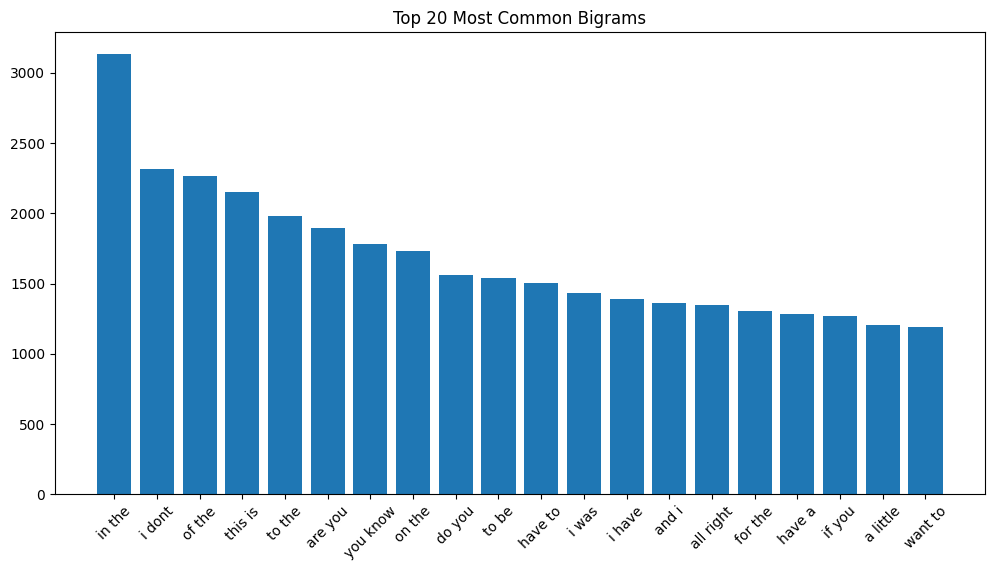

In [ ]:
from nltk import bigrams
from collections import Counter

bigram_list = list(bigrams(' '.join(df['cleaned_text']).split()))
bigram_freq = Counter(bigram_list).most_common(20)

bigram_labels = [' '.join(b) for b, _ in bigram_freq]
bigram_counts = [count for _, count in bigram_freq]

plt.figure(figsize=(12,6))
plt.bar(bigram_labels, bigram_counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Bigrams')
plt.show()

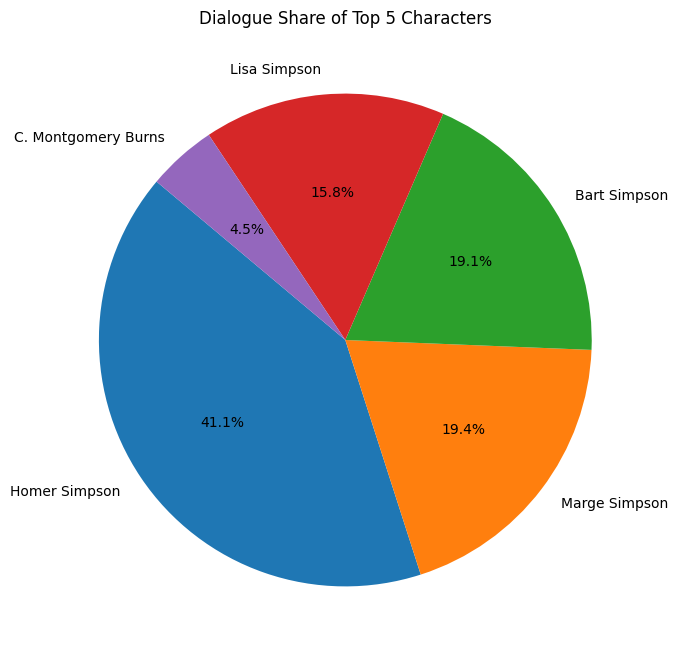

In [ ]:
top_chars = df['raw_character_text'].value_counts().head(5)
top_chars.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8,8))
plt.title("Dialogue Share of Top 5 Characters")
plt.ylabel('')
plt.show()